# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [2]:
N = 29  # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial.distance import cdist


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """

    def __init__(self, eps=0.7, min_pts=5):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps = eps
        self.min_pts = min_pts

    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.cluster_cnt = 0
        self.labels = np.zeros(X.shape[0])

        NV = np.ones(X.shape[0])  # not visited points

        all_dist = cdist(X, X)  # dist between all pairs

        while(NV.sum() != 0):
            x_i = NV.argmax()

            NV[x_i] = 0

            neighbour = self.neighbours(all_dist, x_i)

            if neighbour.shape[0] < self.min_pts:
                self.labels[x_i] = -1  # noise
            else:
                self.fill_cluster(X, NV, all_dist, x_i,
                                  list(neighbour), self.cluster_cnt)

                self.cluster_cnt += 1

        return self

    def neighbours(self, all_dist, x_i):
        return np.arange(all_dist.shape[0])[all_dist[x_i] <= self.eps]

    def fill_cluster(self, X, NV, all_dist, x_i, neighbour, c):
        self.labels[x_i] = c

        for i in neighbour:
            if NV[i]:
                NV[i] = 0  # visited point

                neighbours_i = self.neighbours(all_dist, i)

                if neighbours_i.shape[0] >= self.min_pts:
                    neighbour += list(neighbours_i)

                self.labels[i] = c

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

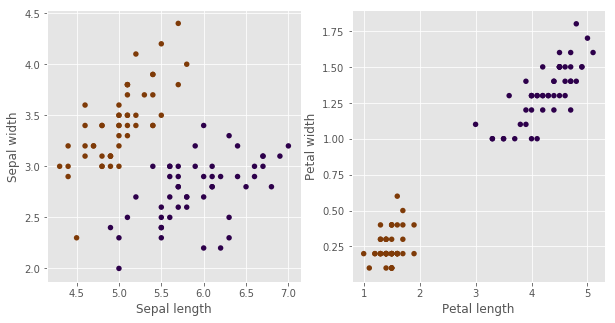

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
pred_iris = Clustering().fit_predict(x_iris)

print "Adjusted Rand index for iris is: %.2f" % \
    smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [7]:
model = sc.DBSCAN(metric='euclidean')

%timeit model.fit_predict(x_iris)

100 loops, best of 3: 3.04 ms per loop


In [8]:
model = Clustering()

%timeit model.fit_predict(x_iris)

100 loops, best of 3: 5.42 ms per loop


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [9]:
# Задание 2
# Silhouette


def quality(X, y):
    clusters = np.unique(y)

    if clusters.shape[0] == 1:
        return 0

    silhouette = np.zeros((X.shape[0], 1))
    all_dist = cdist(X, X)  # dist between all pairs

    # avg dist from points to clusters
    cluster_dist = np.zeros((X.shape[0], clusters.shape[0]))

    cluster_dist_arr = []

    for i in clusters:
        cluster_dist_arr.append(
            all_dist[:, y == i].mean(axis=1).reshape(-1, 1))

    cluster_dist = np.concatenate(cluster_dist_arr, axis=1)

    for i in clusters:
        dist_i = cluster_dist[y == i][:, clusters == i].reshape(-1, 1)
        min_dist_ne_i = cluster_dist[y == i][:,
                                             clusters != i].min(axis=1).reshape(-1, 1)

        silhouette[y == i] = (min_dist_ne_i - dist_i) / np.concatenate([dist_i, min_dist_ne_i],
                                                                       axis=1).max(axis=1).reshape(-1, 1)

    return silhouette.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

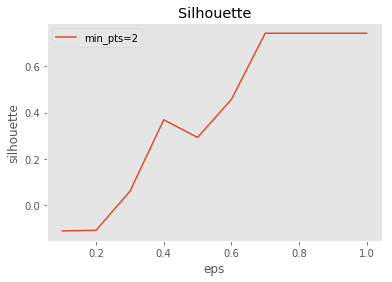

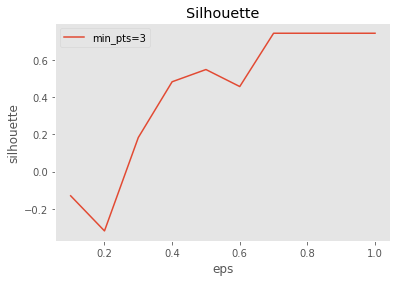

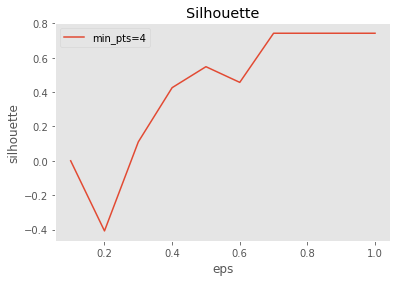

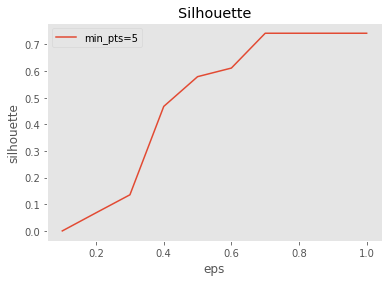

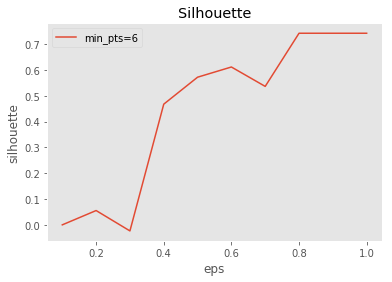

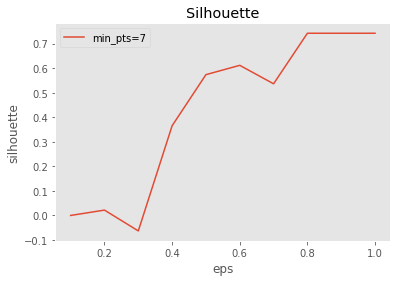

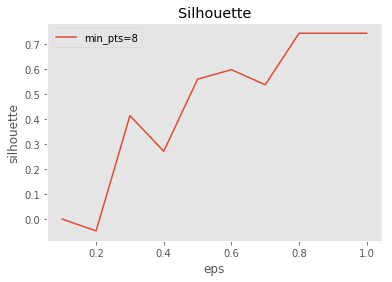

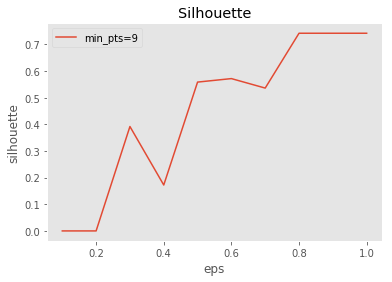

In [10]:
min_pts = range(2, 10)
eps = np.arange(0.1, 1.1,  0.1)

criteria = np.zeros((len(min_pts), len(eps)))

for i, pts in enumerate(min_pts):
    for j, e in enumerate(eps):
        model = Clustering(min_pts=pts, eps=e)

        y = model.fit_predict(x_iris)

        criteria[i][j] = quality(x_iris, y)

    pl.plot(eps, criteria[i], label='min_pts=' + str(pts))

    pl.title("Silhouette")
    pl.xlabel('eps')
    pl.ylabel('silhouette')

    pl.legend()
    pl.grid()
    pl.show()

In [11]:
## Задание 3
data = pd.read_csv('WDIData.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [12]:
year = '2012'

data_2012 = data[['Country Name', 'Indicator Name', year]]
data_2012 = data_2012.pivot(index='Country Name',
                            columns='Indicator Name', values=year)
data_2012 = data_2012.fillna(data_2012.mean())
data_2012 = data_2012.dropna(axis=1, how='all')

data_2012.to_csv('WDI_2012.scv')

data_2012.head()

Indicator Name,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,63.816,24.080000,69.10000,63.800000,95.000000,36.656599,30.781859,10.765360,14.108518,91.341338,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,28.584237
Albania,63.816,69.960000,100.00000,100.000000,100.000000,33.232054,27.989924,6.017248,12.226881,90.465103,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,29.631107
Algeria,76.200,92.470000,98.76466,97.858784,99.256738,36.656599,30.781859,10.765360,14.108518,99.110832,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,45.062444
American Samoa,63.816,62.478125,80.79987,74.475556,90.562795,36.656599,30.781859,10.765360,14.108518,91.341338,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,41.920036
Andorra,63.816,100.000000,100.00000,100.000000,100.000000,36.656599,30.781859,10.765360,14.108518,91.341338,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,41.920036


In [13]:
df = pd.read_csv('WDI_2012.scv')
df.head()

,Country Name,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,63.816,24.080000,69.10000,63.800000,95.000000,36.656599,30.781859,10.765360,14.108518,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,28.584237
1,Albania,63.816,69.960000,100.00000,100.000000,100.000000,33.232054,27.989924,6.017248,12.226881,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,29.631107
2,Algeria,76.200,92.470000,98.76466,97.858784,99.256738,36.656599,30.781859,10.765360,14.108518,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,45.062444
3,American Samoa,63.816,62.478125,80.79987,74.475556,90.562795,36.656599,30.781859,10.765360,14.108518,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,41.920036
4,Andorra,63.816,100.000000,100.00000,100.000000,100.000000,36.656599,30.781859,10.765360,14.108518,...,47.185714,27.668,22.453846,13.407692,26.714286,29.857143,19.553846,7.671429,21.211111,41.920036


In [14]:
x_train = df.iloc[:, 1:].values

# non-zero std index
index = x_train.std(axis=0) != 0

x_train[:, index] = (x_train[:, index] - x_train[:, index].mean(axis=0)) / \
    x_train[:, index].std(axis=0)

x_train = x_train[:, index]

In [15]:
pred_x = Clustering(min_pts=2, eps=25).fit_predict(x_train)

Clusters = np.unique(pred_x)

cluster = []

for i in Clusters:
    cluster.append(df.iloc[:, 0][pred_x == i])

In [16]:
print cluster[0]

# страны, распознаваемые DBSCAN'ом как шум (топ развитых стран + страны "третьего мира")

0                                     Afghanistan
1                                         Albania
2                                         Algeria
5                                          Angola
8                                       Argentina
9                                         Armenia
13                                     Azerbaijan
15                                        Bahrain
16                                     Bangladesh
18                                        Belarus
20                                         Belize
21                                          Benin
23                                         Bhutan
24                                        Bolivia
25                         Bosnia and Herzegovina
26                                       Botswana
27                                         Brazil
29                              Brunei Darussalam
31                                   Burkina Faso
32                                        Burundi


In [17]:
print cluster[1]

# развивающиеся страны, страны со средним уровнем экономического развития

3                                    American Samoa
4                                           Andorra
6                               Antigua and Barbuda
7                                        Arab World
10                                            Aruba
11                                        Australia
12                                          Austria
14                                     Bahamas, The
17                                         Barbados
19                                          Belgium
22                                          Bermuda
28                           British Virgin Islands
30                                         Bulgaria
33                                       Cabo Verde
36                                           Canada
37                           Caribbean small states
38                                   Cayman Islands
40                   Central Europe and the Baltics
42                                  Channel Islands
51          

In [18]:
print cluster[2]

# процветающие страны Европы

56     Denmark
179     Norway
232     Sweden
Name: Country Name, dtype: object


In [19]:
print cluster[3]

# Восточная Азия

61                            East Asia & Pacific
62     East Asia & Pacific (IDA & IBRD countries)
102                                     IBRD only
128                     Late-demographic dividend
Name: Country Name, dtype: object


In [20]:
print cluster[4]

# центральная Европа, Евросоюз

71                Euro area
72    Europe & Central Asia
75           European Union
Name: Country Name, dtype: object


In [21]:
print cluster[5]

# развитые страны, страны с высоким достатком 

98                   High income
181                 OECD members
194    Post-demographic dividend
Name: Country Name, dtype: object


In [22]:
print cluster[6]

# Юго-восточная Азия

217                 South Asia
218    South Asia (IDA & IBRD)
Name: Country Name, dtype: object


In [23]:
X_TSNE = sm.TSNE(n_components=2).fit_transform(x_train)

X_TSNE.shape

(264, 2)

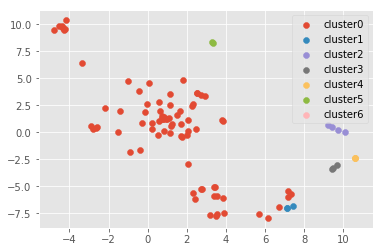

In [24]:
# Задание 4
for i in xrange(Clusters.shape[0]):
    plt.scatter(X_TSNE[pred_x == i, 0], X_TSNE[pred_x == i, 1],
                label='cluster'+str(i))

plt.legend()

### Вывод
DBSCAN выделяет:

1. Большой кластер с элементами, воспринимаемыми как выброс (кластер 0 - топ развитых стран + страны "третьего мира")

2. Большой кластер развитых стран со средним уровнем экономического развития (кластер 1 - Австралия, Португалия, Швеция, Польша и др.)

3. Несколько специфических кластеров (по географическому расположению страны с соответствующими социально-экономическими характеристиками) - Евросоюз, процветающие страны Европы, страны Восточной и Юго-Восточной Азии и др.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.